## Mini Project 2- Solution




### Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from datetime import datetime, date
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

C:\Users\Abhishek\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

### Load given dataset

In [ ]:
df_train = pd.read_csv('Consumer_Complaints_train.csv')
df_test = pd.read_csv('Consumer_Complaints_test.csv')

### Print top 5 records of train dataset

In [ ]:
df_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


### Print top 5 records of test dataset

In [ ]:
df_test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


### Print shape of train and test dataset 

In [ ]:
df_train.shape, df_test.shape

((358810, 18), (119606, 17))

### Print columns of train and test datasets

In [ ]:
df_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [ ]:
df_test.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

### Checking data type for both datasets

In [ ]:
data_types_train = pd.DataFrame(df_train.dtypes, columns = ['Train'])
data_types_test = pd.DataFrame(df_test.dtypes, columns = ['Test'])
data_types = pd.concat([data_types_train, data_types_test], axis = 1)
data_types

,Train,Test
Date received,object,object
Product,object,object
Sub-product,object,object
Issue,object,object
Sub-issue,object,object
Consumer complaint narrative,object,object
Company public response,object,object
Company,object,object
State,object,object
ZIP code,object,object


### Printing missing values in percentage

In [ ]:
missing_values_train = pd.DataFrame(df_train.isna().sum()/len(df_train)*100, columns = ['Train'])
missing_values_test = pd.DataFrame(df_test.isna().sum()/len(df_test)*100, columns = ['Test'])
missing_values = pd.concat([missing_values_train, missing_values_test], axis = 1)
missing_values

,Train,Test
Date received,0.000000,0.000000
Product,0.000000,0.000000
Sub-product,28.925058,28.997709
Issue,0.000000,0.000000
Sub-issue,61.139322,61.242747
Consumer complaint narrative,84.342688,84.186412
Company public response,81.067696,81.221678
Company,0.000000,0.000000
State,0.809063,0.782569
ZIP code,0.811293,0.783406


### Drop columns where more than 25% of the data are missing.

In [ ]:
missing_values = ['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?']
df_train = df_train.drop(missing_values, axis = 1)
df_test = df_test.drop(missing_values, axis = 1)

### Extract Date, Month, and Year from the "Date Received" Column and create new fields for year, month, and day.

ex. df_train['Year_Received'] = df_train['Date received']........(logic)

In [ ]:
df_train['Year_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df_test['Year_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df_train['Month_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df_test['Month_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df_train['Day_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)
df_test['Day_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)

### Convert dates from object type to datetime type

In [ ]:
df_train['Date received'] = pd.to_datetime(df_train['Date received'])
df_test['Date received'] = pd.to_datetime(df_test['Date received'])
df_train['Date sent to company'] = pd.to_datetime(df_train['Date sent to company'])
df_test['Date sent to company'] = pd.to_datetime(df_test['Date sent to company'])

### Calculate the number of days the complaint was with the company

In [ ]:
df_train['Days held'] = df_train['Date sent to company'] - df_train['Date received']
df_test['Days held'] = df_test['Date sent to company'] - df_test['Date received']

### Convert "Days Held" to Int(above column)

In [ ]:
df_train['Days held'] = df_train['Days held'].astype('timedelta64[D]').astype(int)
df_test['Days held'] = df_test['Days held'].astype('timedelta64[D]').astype(int)

### Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"

In [ ]:
df_train = df_train.drop(['Date received', 'Date sent to company','ZIP code', 'Complaint ID'], axis = 1)
df_test = df_test.drop(['Date received', 'Date sent to company','ZIP code', 'Complaint ID'], axis = 1)

### Impute null values in "State" by Mode

In [ ]:
df_train['State'].mode(), df_test['State'].mode()

(0    CA
 Name: State, dtype: object,
 0    CA
 Name: State, dtype: object)

In [ ]:
df_train['State'] = df_train['State'].replace(np.nan, 'CA')
df_test['State'] = df_test['State'].replace(np.nan, 'CA')

### Check Missing Values in the dataset

In [ ]:
missing_values_train = pd.DataFrame(df_train.isna().sum(), columns = ['Train'])
missing_values_test = pd.DataFrame(df_test.isna().sum(), columns = ['Test'])
missing_values = pd.concat([missing_values_train, missing_values_test], axis = 1)
missing_values

,Train,Test
Product,0,0.0
Issue,0,0.0
Company,0,0.0
State,0,0.0
Submitted via,0,0.0
Company response to consumer,0,0.0
Timely response?,0,0.0
Consumer disputed?,0,NaN
Year_Received,0,0.0
Month_Received,0,0.0


### Categorize Days into Weeks with the help of 'Days Received'

In [ ]:
week_train = []
for i in df_train['Day_Received']:
    if i < 8:
        week_train.append(1)
    elif i >= 8 and i < 16:
        week_train.append(2)
    elif i >=16 and i < 22:
        week_train.append(3)
    else:
        week_train.append(4)
df_train['Week_Received'] = week_train
week_test = []
for i in df_test['Day_Received']:
    if i < 8:
        week_test.append(1)
    elif i >= 8 and i < 16:
        week_test.append(2)
    elif i >=16 and i < 22:
        week_test.append(3)
    else:
        week_test.append(4)
df_test['Week_Received'] = week_test

### Drop "Day_Received"

In [ ]:
df_train = df_train.drop(['Day_Received'], axis = 1)
df_test = df_test.drop(['Day_Received'], axis = 1)

### Print head of train and test dataset and observe

In [ ]:
df_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year_Received,Month_Received,Days held,Week_Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,14,3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,1,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,0,4


In [ ]:
#test dataset 
df_test.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year_Received,Month_Received,Days held,Week_Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,0,4
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,0,1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,3,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,0,1


### Store data of the disputed consumer in the new data frame as "disputed_cons"

In [ ]:
disputed_cons = df_train[df_train['Consumer disputed?'] == 'Yes']

### Plot bar graph for the total no of disputes with the help of seaborn

Text(0, 0.5, 'Count')

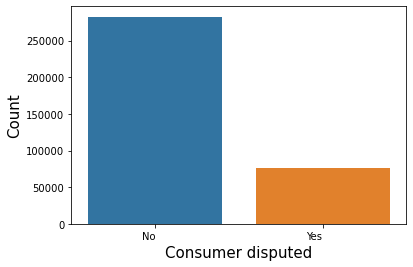

In [ ]:
sns.countplot(x = 'Consumer disputed?', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Consumer disputed', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

            Roughly 21% of the consumer have disputed.

### Plot bar graph for the total no of disputes products-wise with help of seaborn

Text(0, 0.5, 'Count')

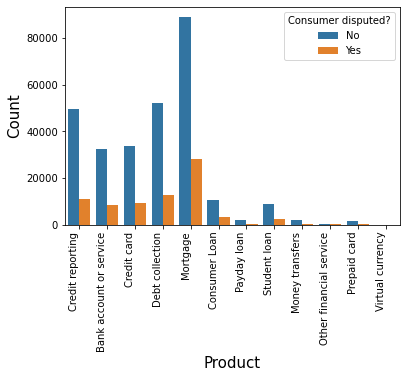

In [ ]:
sns.countplot(x = 'Product', hue = 'Consumer disputed?', data = df_train)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Product', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Plot  bar graph for the total no of disputes with Top Issues by Highest Disputes , with help of seaborn

Text(0, 0.5, 'Count')

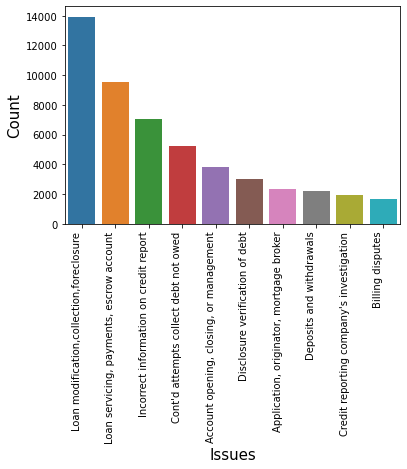

In [ ]:
top_issues_disputes = disputed_cons['Issue'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = top_issues_disputes.index, y = top_issues_disputes.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Issues', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

### Plot  bar graph  for the total no of disputes by State with Maximum Disputes

Text(0, 0.5, 'Count')

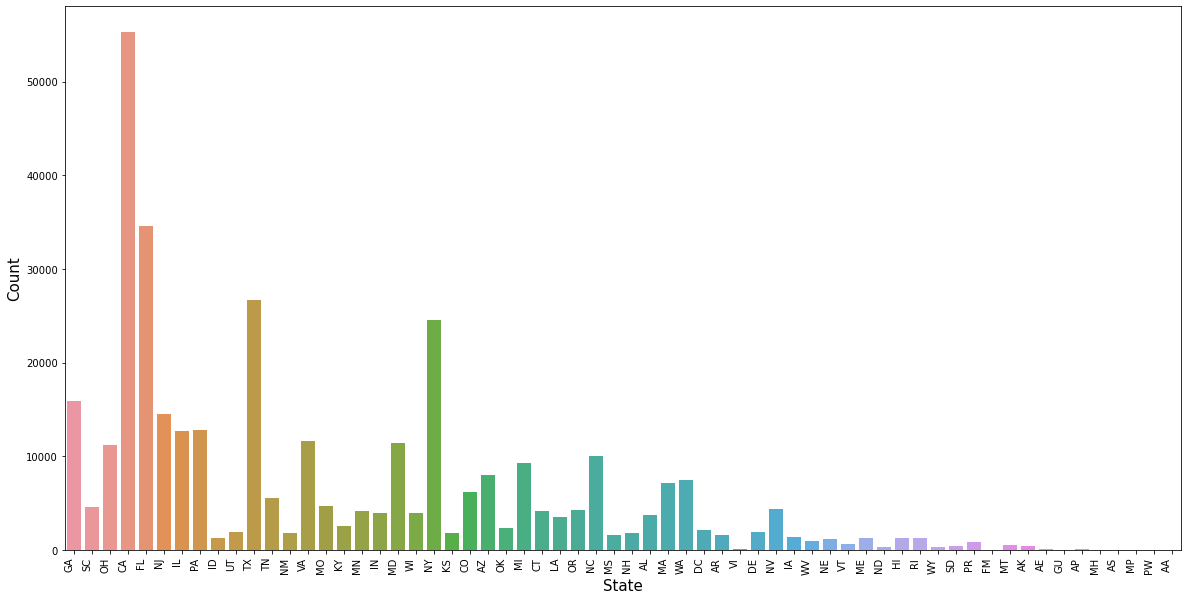

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x = df_train['State'])
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

    15% disputes from CA.
    25% disputes from CA and FL
    32% disputes from CA, FL and TX.
    38% disputes from CA, FL, TX and NY.
    43% disputes from CA, FL, TX, NY and GA.
    47% disputes from CA, FL, TX, NY, GA and NJ.
    50% disputes from CA, FL, TX, NY, GA, NJ and IL.
    54% disputes from CA, FL, TX, NY, GA, NJ, IL and VA.
    57% disputes from CA, FL, TX, NY, GA, NJ, IL, VA and PA.
    61% disputes from CA, FL, TX, NY, GA, NJ, IL, VA, PA and MD.

### Plot the bar graph for the total no of disputes by Submitted Via diffrent source 

Text(0, 0.5, 'Count')

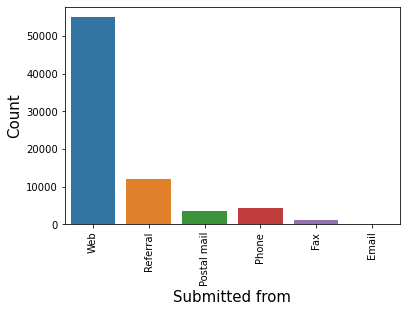

In [ ]:
sns.countplot(x = 'Submitted via', data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Submitted from', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

    72% disputes are submitted via web.
    88% disputes are submitted via web and referral.

### Plot bar graph for the total no of disputes where Company's Response to the Complaints

Text(0, 0.5, 'Count')

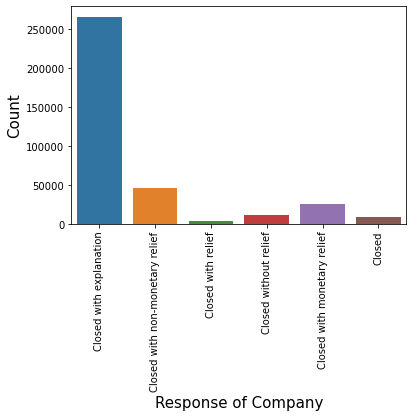

In [ ]:
sns.countplot(x = 'Company response to consumer', data = df_train)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Response of Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

    74% complaints are closed with explanation

### Plot bar graph for the total no of disputes where Company's Response Leading to Disputes

Text(0, 0.5, 'Count')

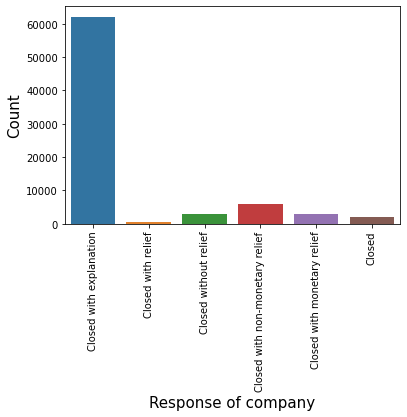

In [ ]:
sns.countplot(x = 'Company response to consumer', data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Response of company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

    82% disputes are closed with explanation at the initial stage.
    89% disputes are either closed with explanation or non-monetary relief in the earlier stage.

### Plot bar graph for the total no of disputes Whether there are Disputes Instead of Timely Response

Text(0, 0.5, 'Count')

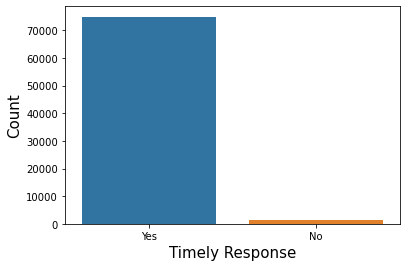

In [ ]:
sns.countplot(x = 'Timely response?', data = disputed_cons)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Timely Response', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

    98% disputes were timely repsonded at the intial stages.

### Plot the bar graph for the total no of disputes over Year Wise Complaints

Text(0, 0.5, 'Count')

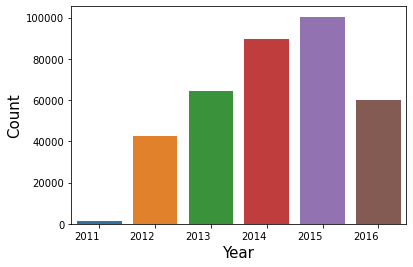

In [ ]:
sns.countplot(x = 'Year_Received', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

        28% complaints are raised in 2015.
        53% complaints are raised in 2014 and 2015.
        71% complaints are raised in 2013 to 2015.
        88% complaints are raised in 2013 to 2016.

### Plot bar graph for the total no of disputes over Year Wise Disputes

Text(0, 0.5, 'Count')

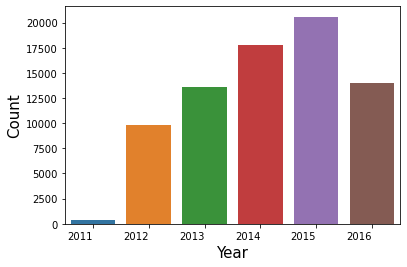

In [ ]:
sns.countplot(x = 'Year_Received', data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

    27% disputes are raised in 2015.
    50% disputes are raised in 2014 and 2015.
    69% disputes are raised in 2014 to 2016.
    87% disputes are raised in 2013 to 2016.

### Plot bar graph for the top companies with Highest Complaints

Text(0, 0.5, 'Count')

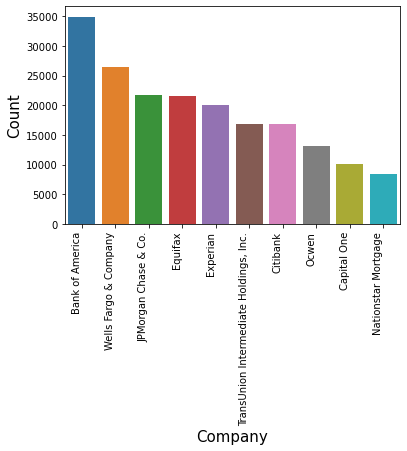

In [ ]:
worst_company_complaints = df_train['Company'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = worst_company_complaints.index, y = worst_company_complaints.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

          53% complaints are for these 10 companies.

### "Days Held" Column Analysis(describe)

In [ ]:
df_train['Days held'].describe()

count    358810.000000
mean          4.456339
std          16.741676
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Days held, dtype: float64

In [ ]:
df_test['Days held'].describe()

count    119606.000000
mean          4.443607
std          16.233377
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         832.000000
Name: Days held, dtype: float64

### Convert Negative Days Held to Zero(it is the time taken by authority can't be negative)

In [ ]:
Days_held_train = []
for i in df_train['Days held']:
    if i < 0:
        Days_held_train.append(0)
    else:
        Days_held_train.append(i)
df_train['Days_held'] = Days_held_train
Days_held_test = []
for i in df_test['Days held']:
    if i < 0:
        Days_held_test.append(0)
    else:
        Days_held_test.append(i)
df_test['Days_held'] = Days_held_test

### Drop Days Held with Negative Values

In [ ]:
df_train = df_train.drop('Days held', axis = 1)
df_test = df_test.drop('Days held', axis = 1)

### Text pre-processing
(It will be cover in upcoming calsses)

In [ ]:
relevant_text_train = df_train['Issue']
relevant_text_test = df_test['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [ ]:
df_train['Issues_cleaned'] = clean_data_train
df_test['Issues_cleaned'] = clean_data_test
df_train = df_train.drop('Issue', axis = 1)
df_test = df_test.drop('Issue', axis = 1)

### Drop Unnecessary  Columns for the Model Building 
like:'Company', 'State', 'Year_Received', 'Days_held'

In [ ]:
drop_cols = ['Company', 'State', 'Year_Received', 'Days_held']
df_train = df_train.drop(drop_cols, axis = 1)
df_test = df_test.drop(drop_cols, axis = 1)

### Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [ ]:
df_train['Consumer disputed?'] = np.where(df_train['Consumer disputed?'] == "Yes", 1, 0)

### Create Dummy Variables for catagorical features 
like: 'Product', 'Submitted via', 'Company response to consumer', 'Timely response?'

In [ ]:
dum_cols = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']
df_train_dummies = pd.get_dummies(df_train[dum_cols], prefix_sep = '_', drop_first = True)
df_test_dummies = pd.get_dummies(df_test[dum_cols], prefix_sep = '_', drop_first = True)

### Concate dummy variables and drop the original columns

In [ ]:
df_train = df_train.drop(dum_cols, axis = 1)
df_test = df_test.drop(dum_cols, axis = 1)
df_train = pd.concat([df_train, df_train_dummies], axis = 1)
df_test = pd.concat([df_test, df_test_dummies], axis = 1)

### Calculating TF-IDF

In [ ]:
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(df_train['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(df_test['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
overdraft,11.305672
featur,11.305672


### Replacing Issues_cleaned by Vectorized Issues

In [ ]:
df_train = df_train.drop('Issues_cleaned', axis = 1)
df_test = df_test.drop('Issues_cleaned', axis = 1)
df_train = pd.concat([df_train, issues_train], axis = 1)
df_test = pd.concat([df_test, issues_test], axis = 1)
Feature168 = [0] * 119606
df_test['Feature168'] = Feature168

### observe train and test data

In [ ]:
df_train.head()


,Consumer disputed?,Month_Received,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,Product_Virtual currency,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46,Feature47,Feature48,Feature49,Feature50,Feature51,Feature52,Feature53,Feature54,Feature55,Feature56,Feature57,Feature58,Feature59,Feature60,Feature61,Feature62,Feature63,Feature64,Feature65,Feature66,Feature67,Feature68,Feature69,Feature70,Feature71,Feature72,Feature73,Feature74,Feature75,Feature76,Feature77,Feature78,Feature79,Feature80,Feature81,Feature82,Feature83,Feature84,Feature85,Feature86,Feature87,Feature88,Feature89,Feature90,Feature91,Feature92,Feature93,Feature94,Feature95,Feature96,Feature97,Feature98,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118,Feature119,Feature120,Feature121,Feature122,Feature123,Feature124,Feature125,Feature126,Feature127,Feature128,Feature129,Feature130,Feature131,Feature132,Feature133,Feature134,Feature135,Feature136,Feature137,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147,Feature148,Feature149,Feature150,Feature151,Feature152,Feature153,Feature154,Feature155,Feature156,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,10,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399029,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.469431,0.0,0.0,0.469773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.469773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.537342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.596349,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.596349,0.0,0.0,0.0

In [ ]:
df_test.head()

,Month_Received,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,Product_Virtual currency,Submitted via_Fax,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46,Feature47,Feature48,Feature49,Feature50,Feature51,Feature52,Feature53,Feature54,Feature55,Feature56,Feature57,Feature58,Feature59,Feature60,Feature61,Feature62,Feature63,Feature64,Feature65,Feature66,Feature67,Feature68,Feature69,Feature70,Feature71,Feature72,Feature73,Feature74,Feature75,Feature76,Feature77,Feature78,Feature79,Feature80,Feature81,Feature82,Feature83,Feature84,Feature85,Feature86,Feature87,Feature88,Feature89,Feature90,Feature91,Feature92,Feature93,Feature94,Feature95,Feature96,Feature97,Feature98,Feature99,Feature100,Feature101,Feature102,Feature103,Feature104,Feature105,Feature106,Feature107,Feature108,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118,Feature119,Feature120,Feature121,Feature122,Feature123,Feature124,Feature125,Feature126,Feature127,Feature128,Feature129,Feature130,Feature131,Feature132,Feature133,Feature134,Feature135,Feature136,Feature137,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147,Feature148,Feature149,Feature150,Feature151,Feature152,Feature153,Feature154,Feature155,Feature156,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.874274,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.437137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211085,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,6,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0,0.753491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.243968,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.329255,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.291153,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423737,0.

### Observe Shape of new Train and Test Data

In [ ]:
df_train.shape, df_test.shape

((358810, 193), (119606, 192))

### Scaling the Data Sets (note: Discard dependent variable before doing standardization)

In [ ]:
df_train_scaled = pd.DataFrame(StandardScaler().fit_transform(df_train.drop('Consumer disputed?', axis = 1)), columns = df_test.columns)
df_test_scaled = pd.DataFrame(StandardScaler().fit_transform(df_test), columns = df_test.columns)

### Do feature selection with help of PCA

In [ ]:
pca_columns = []
for i in range(df_train_scaled.shape[1]):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA()
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)
explained_info_train = pd.DataFrame(pca_model.explained_variance_ratio_, columns=['Explained Info']).sort_values(by = 'Explained Info', ascending = False)
imp = []
for i in range(explained_info_train.shape[0]):
    imp.append(explained_info_train.head(i).sum())
explained_info_train_sum = pd.DataFrame()
explained_info_train_sum['Variable'] = pca_columns
explained_info_train_sum['Importance'] = imp
explained_info_train_sum.head(60)

,Variable,Importance
0,PC1,Explained Info 0.0 dtype: float64
1,PC2,Explained Info 0.035882 dtype: float64
2,PC3,Explained Info 0.069329 dtype: float64
3,PC4,Explained Info 0.10149 dtype: float64
4,PC5,Explained Info 0.128148 dtype: float64
5,PC6,Explained Info 0.153022 dtype: float64
6,PC7,Explained Info 0.177157 dtype: float64
7,PC8,Explained Info 0.199399 dtype: float64
8,PC9,Explained Info 0.221115 dtype: float64
9,PC10,Explained Info 0.242562 dtype: float64


### Select top features which are covering 80% of the information (n=53) 
store this data into new dataframe,

In [ ]:
pca_columns = []
for i in range(53):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA(n_components = 53)
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)

In [ ]:
df_pca_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,5.356830,-2.269566,-1.152841,-1.027606,0.162159,-0.915759,-0.481009,0.338711,0.085803,-0.101535,-0.200202,0.744990,-0.279820,-0.285027,-0.284952,0.256084,-0.168862,0.064244,0.373687,0.031945,-0.010235,0.071722,-0.594397,0.007088,-0.381604,0.815957,0.053145,-0.421252,0.047791,-0.546928,-0.124254,0.137273,-0.646730,0.029505,-0.075608,-0.109075,0.068144,0.116009,-0.147678,-0.037533,-0.038977,0.058210,0.001191,-0.138626,-0.047822,0.655101,0.115049,-0.677287,0.149780,-0.586736,-0.581300,-0.226907,-0.071168
1,-0.147024,0.019653,-0.053118,0.799098,-0.439510,-0.153200,1.477051,-0.277448,-0.866250,0.111114,0.058705,-1.519350,0.051870,5.705741,-1.429620,1.826824,-0.328715,0.615569,-0.002772,0.094491,-0.209473,0.003440,0.589339,0.044679,-0.237469,0.949000,-5.512853,1.301602,2.421593,-0.245660,0.199358,0.231751,0.611460,0.074259,-0.203470,-0.121792,-0.053909,0.132304,0.783790,-1.114538,-0.231035,-0.441092,-0.064773,-0.066499,-0.133372,0.754201,0.023234,-0.412785,0.095151,-1.319137,-1.614633,-0.290322,0.594651
2,0.157997,-0.003555,-0.005809,0.809507,-0.613923,0.028939,1.094416,0.108128,-1.048875,0.090924,-0.166707,-0.942424,0.492435,0.460612,0.084990,-0.995776,0.330328,-0.273171,-0.095116,0.134550,0.022561,-0.709991,0.195044,0.013053,0.894380,0.279412,-0.293287,0.303033,-1.459052,0.584451,-0.456761,-0.273379,-0.533038,-0.053783,0.123789,0.124369,-0.182714,-0.273045,0.202563,0.110763,0.096146,-0.014433,0.018159,-0.374324,0.386881,-1.459796,1.344658,0.508605,-0.955972,0.819070,1.913510,-0.203142,-0.192755
3,-0.817889,-0.911807,3.535560,0.336639,-0.903082,-0.165170,-0.588762,-1.258533,0.287688,-0.154246,3.132646,0.099471,1.143916,0.489905,-0.442396,-0.496282,-0.313644,-5.564761,1.448921,-2.683487,-2.776692,-0.971058,2.897979,-0.153714,-2.228005,0.328730,0.730474,-0.251667,1.065159,-0.311326,-0.897124,0.894709,-0.047065,-0.184531,0.782176,-0.203564,-0.121157,-0.077342,0.023538,0.091618,0.011457,-0.000236,0.149227,0.108808,-0.043108,-0.021278,-0.114540,-0.101559,-0.220058,0.956293,0.968278,0.094583,-0.422776
4,-0.509837,-1.051668,3.915014,0.487450,-0.841883,-0.060433,-0.677953,-1.393070,0.721913,-0.291009,3.018932,0.055362,1.393428,0.409442,-0.480264,-0.505755,-0.386174,-5.542341,1.624920,-2.724252,-2.628083,-0.832192,2.400131,-0.166247,-2.141785,0.096976,1.063184,-0.156286,0.813917,-0.091179,-0.559799,0.771812,0.279198,-0.246127,0.594424,-0.170385,-0.010835,-0.009504,-0.236856,0.059643,-0.021639,0.080391,0.018321,0.064457,-0.038762,0.189119,-0.038923,-0.000213,0.068514,-0.548663,-0.605994,-0.121779,0.160578


In [ ]:
#same for test data also
pca_model = PCA(n_components = 53)
pca_model.fit(df_test_scaled)
df_pca_test = pd.DataFrame(pca_model.transform(df_test_scaled), columns = pca_columns)

In [ ]:
df_pca_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,-0.130033,0.380650,-0.245430,1.356614,-1.033692,-0.134187,1.259874,0.376938,-1.047714,-0.422202,-0.196472,-1.697799,1.711672,0.676057,0.401167,-2.067038,-0.189945,0.740033,-0.350649,-0.049415,-0.140585,-0.585997,-0.211406,2.738007,1.502352,-0.356069,-0.206657,1.283614,-5.331352,0.929486,-2.625718,-0.188031,-0.712088,0.578556,-3.426267,-0.380923,17.581690,-2.260697,0.533139,-1.872576,2.482147,-1.712069,3.238046,1.757401,-0.173824,1.640477,2.314785,0.892963,-1.741615,0.202776,1.132110,-0.126471,-2.283582
1,0.923061,1.554592,0.766762,0.348080,1.320581,4.126863,1.084988,2.543387,2.730785,0.715816,-1.141969,2.108374,1.599922,-0.124513,0.054111,5.584703,3.107196,0.672816,-3.487959,0.127204,-0.581764,0.794450,0.503779,4.286258,0.047476,-2.389157,1.477529,4.114053,0.903014,-1.000418,-0.827715,-0.798901,-0.653994,1.484374,-0.316869,0.328284,-0.176912,-0.869836,0.009726,-0.171721,0.205719,-0.209007,-0.064643,0.504629,0.497607,1.415963,-0.212928,-7.966929,-0.872549,-5.344413,-5.471275,-4.604883,-2.985988
2,0.816352,-0.289730,-0.106777,1.441712,-0.725635,0.391254,1.694825,0.188186,-1.597109,0.682163,0.053742,-1.767989,0.661922,0.542221,-0.136537,-3.503706,-2.633425,4.100392,-2.042673,-1.056629,2.978181,-3.684180,-0.036736,21.742634,-2.713372,6.771517,-0.133004,-13.914516,9.828737,-1.073513,2.040693,-0.228789,0.212645,-1.363892,0.080314,-0.375708,0.243396,0.248180,0.017608,-0.138607,0.335501,0.026278,0.025078,-0.007439,-0.279289,-0.418202,0.790557,-0.118219,0.433286,-1.351876,0.565115,0.395144,-0.278868
3,4.956154,12.125729,2.013869,-2.461254,6.552953,10.518382,-0.181868,-1.315034,0.385929,-0.300266,0.713356,-1.039555,0.960704,0.071026,0.224185,-0.263398,-0.490176,0.247427,0.374574,0.126135,0.314619,-0.395583,-0.951928,-0.713031,0.688320,-3.232164,-0.872170,-2.776450,-1.255463,-3.314949,0.031334,-1.000123,1.020078,0.001931,-0.112703,-0.195392,-0.140398,-0.017629,0.087898,0.138790,-0.130434,-0.045353,0.009834,-0.034437,0.844209,1.588246,0.551955,2.320915,-0.661049,-0.248262,-0.401311,-0.379933,0.392525
4,-0.054899,-0.565673,3.331708,4.384112,-2.563192,0.321209,-3.157232,-5.838973,3.965987,2.821884,10.433471,2.237705,1.710395,-1.869742,-3.094251,0.463220,0.095625,-2.003462,2.669373,4.480467,-2.307862,0.386832,-1.761648,1.737134,0.195517,-0.235537,-0.657970,0.096421,-0.440560,-0.396249,-0.460552,0.156033,-0.029726,-0.029426,0.346375,0.060074,0.020994,-0.081329,0.000618,-0.003954,-0.027322,0.019935,-0.025887,0.061134,0.047964,-0.258749,-0.122078,-0.361088,0.091631,0.172287,0.065910,-0.087584,-0.065314


### Split the Data Sets Into X and Y by dependent and independent variables (data selected by PCA)


In [ ]:
X = df_pca_train
y = df_train['Consumer disputed?']

### Split dataset into Train, and Test datasets
(for test data use test excel file data)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 17)
X_test = df_pca_test

### Shapes of the datasets

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((251167, 53), (107643, 53), (251167,), (107643,), (119606, 53))

### **Model building**
Build given models and measure their test and validation accuracy build given models:
1. LogisticRegression
2.	DecisionTreeClassifier
3.	RandomForestClassifier
4.	AdaBoostClassifier
5.	GradientBoostingClassifier
6.	KNeighborsClassifier
7.	XGBClassifier


In [ ]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), XGBClassifier()]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'XGBClassifier']
accuracy_train = []
accuracy_val = []
for model in models:
    mod = model
    mod.fit(X_train, y_train)
    y_pred_train = mod.predict(X_train)
    y_pred_val = mod.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_val.append(accuracy_score(y_val, y_pred_val))
data = {'Modelling Algorithm' : model_names, 'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val}
data = pd.DataFrame(data)
data['Difference'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data.sort_values(by = 'Validation Accuracy', ascending = False)

C:\Users\Abhishek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Abhishek\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Modelling Algorithm,Train Accuracy,Validation Accuracy,Difference
4,GradientBoostingClassifier,0.787874,0.787399,0.060303
0,LogisticRegression,0.787846,0.787390,0.057947
3,AdaBoostClassifier,0.787846,0.787390,0.057947
6,XGBClassifier,0.788591,0.787083,0.191180
1,DecisionTreeClassifier,0.800790,0.776149,3.077084
2,RandomForestClassifier,0.800786,0.775629,3.141568
5,KNeighborsClassifier,0.762210,0.748233,1.833802


    LogisticRegression is the best model to build the model.

### Final Model and Prediction for test data file

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test, columns = ['Prediction'])
y_pred_test.head()

,Prediction
0,0
1,1
2,0
3,0
4,0


### Export predictions to CSV

In [ ]:
y_pred_test.to_csv('Prediction.csv')

_________________________________________